EDA on the dataset and performance comparison of the top techniques.

In [1]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('dataset/multitude.csv')

In [10]:
len(df['text'][0].split())

174

In [11]:
df.head()

,text,label,multi_label,split,language,length,source
0,Der Ausbruch des Coronavirus hat die Entwicklu...,1,text-davinci-003,test,de,174,MULTITuDE_MassiveSumm_spiegel
1,Alex Azar was officially sworn in as the U.S. ...,1,text-davinci-003,train,en,57,MULTITuDE_MassiveSumm_voanews
2,Європейський союз вимагає зупинити розтрату ко...,1,gpt-3.5-turbo,test,uk,105,MULTITuDE_MassiveSumm_interfax
3,"Yesterday, hundreds of Zambian university stud...",1,text-davinci-003,train,en,254,MULTITuDE_MassiveSumm_voanews
4,"In a narrow and highly watched vote, the US Se...",1,gpt-4,train,en,416,MULTITuDE_MassiveSumm_voanews


In [5]:
unique_languages = df['language'].unique()
print(unique_languages)

for language in unique_languages:
    average_length = df[df['language'] == language]['length'].mean()
    print(f"Average length for language {language}: {average_length}")

print("average_length_total", df['length'].mean())

['de' 'en' 'uk' 'es' 'nl' 'ca' 'ru' 'pt' 'ar' 'zh' 'cs']
Average length for language de: 116.7731843575419
Average length for language en: 209.63703326544467
Average length for language uk: 72.09032983508246
Average length for language es: 155.25901950630072
Average length for language nl: 156.79109461966604
Average length for language ca: 165.20958751393533
Average length for language ru: 71.82725859388495
Average length for language pt: 146.3034044145155
Average length for language ar: 70.53348297792742
Average length for language zh: 98.40216175922475
Average length for language cs: 103.49572331721829
average_length_total 152.55296229802514


In [6]:
max_length = df['length'].max()
print(max_length)

512


In [7]:
test_df = df[df['split'] == 'test']
train_df = df[df['split'] == 'train']

In [8]:
unique_languages = test_df['language'].unique()
print(unique_languages)

['de' 'uk' 'en' 'nl' 'ca' 'ru' 'pt' 'ar' 'es' 'zh' 'cs']


In [9]:
for language in unique_languages:
    # label count
    count = test_df[test_df['language'] == language].shape[0]
    print(f"Count for language {language}: {count}")
    # label == 1 count
    count = test_df[(test_df['language'] == language) & (test_df['label'] == 1)].shape[0]
    print(f"machine: {count}")
    # label == 0 count
    count = test_df[(test_df['language'] == language) & (test_df['label'] == 0)].shape[0]
    print(f"human: {count}")

Count for language de: 2685
machine: 2393
human: 292
Count for language uk: 2668
machine: 2370
human: 298
Count for language en: 2491
machine: 2214
human: 277
Count for language nl: 2695
machine: 2396
human: 299
Count for language ca: 2691
machine: 2391
human: 300
Count for language ru: 2671
machine: 2371
human: 300
Count for language pt: 2673
machine: 2386
human: 287
Count for language ar: 2673
machine: 2374
human: 299
Count for language es: 2676
machine: 2392
human: 284
Count for language zh: 2683
machine: 2383
human: 300
Count for language cs: 2689
machine: 2389
human: 300


In [10]:
# new_df = pd.read_csv('dataset/multic4-new.csv')

In [11]:
test_df = df[df['split'] == 'test']
train_df = df[df['split'] == 'train']

test_df label
1    26059
0     3236
Name: count, dtype: int64
train_df label
1    40030
0     4756
Name: count, dtype: int64


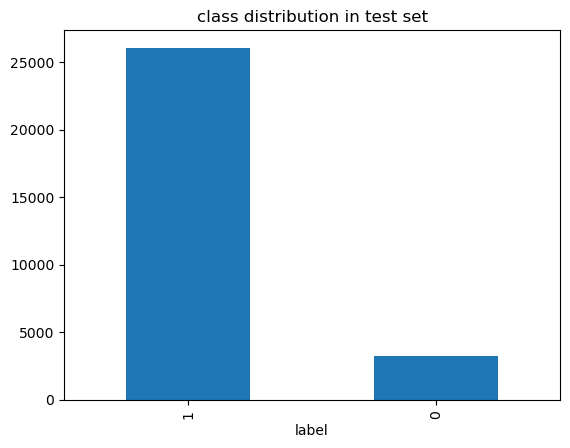

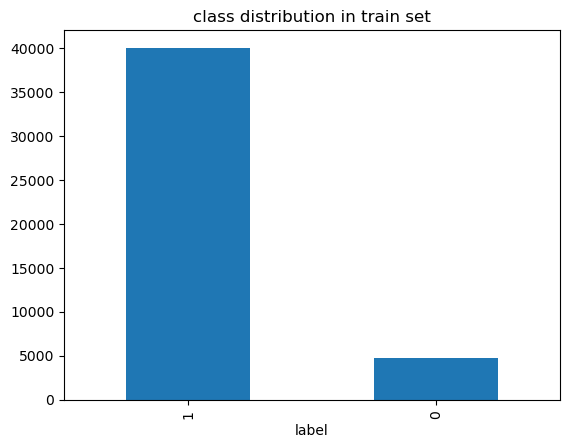

In [12]:
# number of samples as label 0 or 1 in test and train
print("test_df", test_df['label'].value_counts())
print("train_df", train_df['label'].value_counts())

# graph of the number of samples as label 0 or 1 in test and train
import matplotlib.pyplot as plt

test_df['label'].value_counts().plot(kind='bar')
plt.title('class distribution in test set')
plt.show()

train_df['label'].value_counts().plot(kind='bar')
plt.title('class distribution in train set')
plt.show()


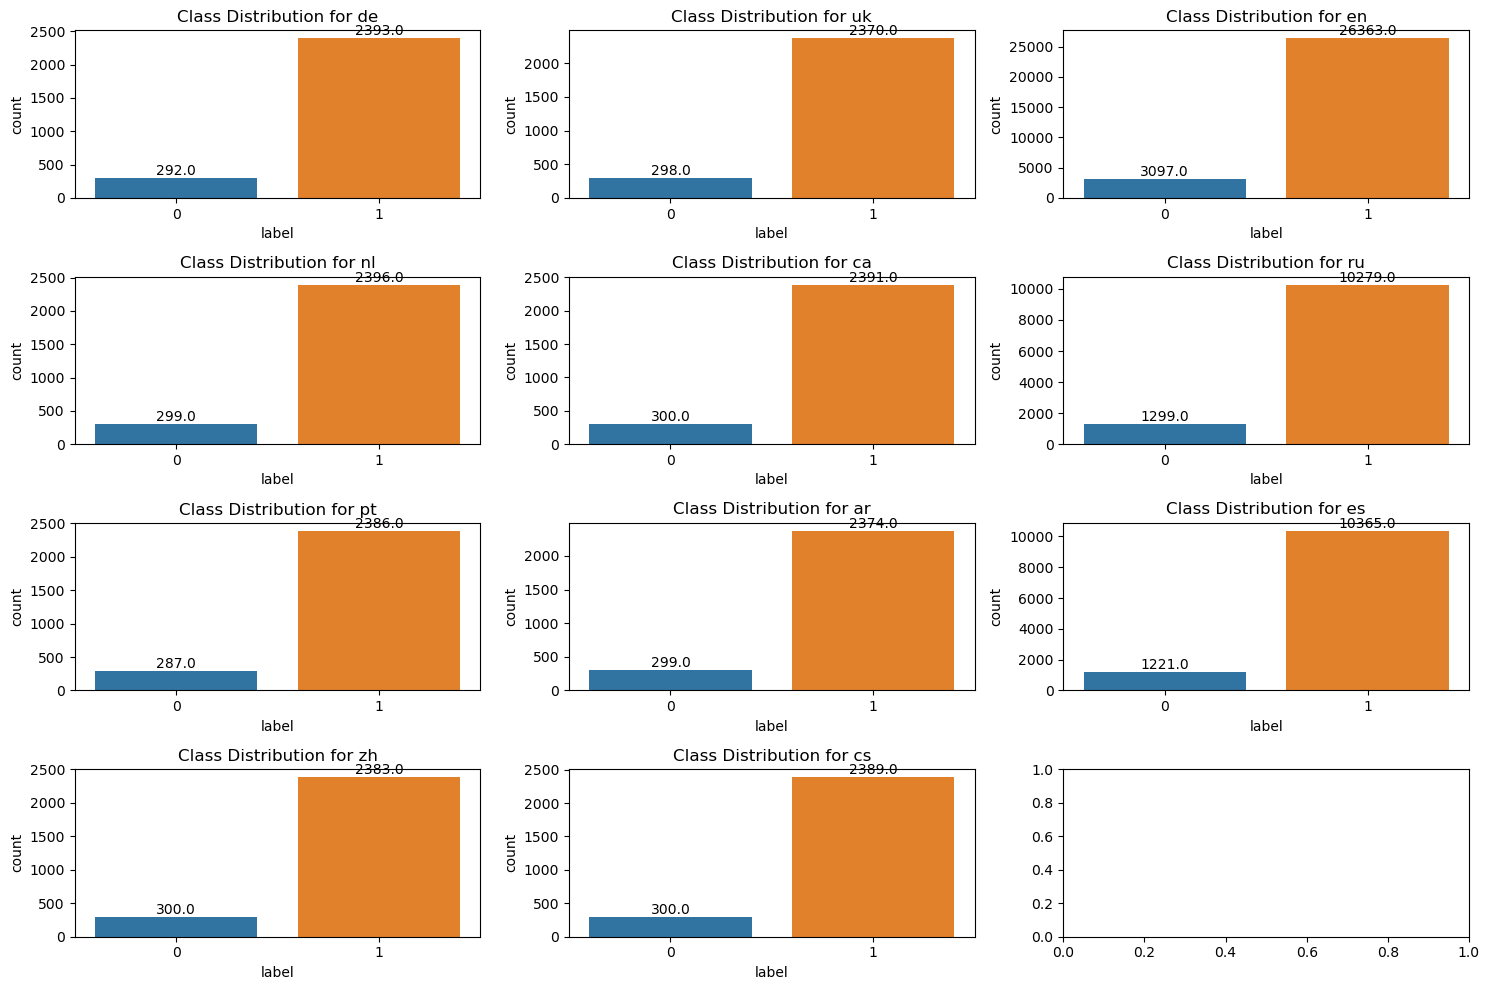

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Iterate over unique languages
for i, language in enumerate(unique_languages):
    # Filter the dataframe for the specific language
    language_df = df[df['language'] == language]
    
    # Plot the class distribution
    ax = axes[i // 3, i % 3]
    sns.countplot(data=language_df, x='label', ax=ax)
    ax.set_title(f'Class Distribution for {language}')
    
    # Add exact values to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

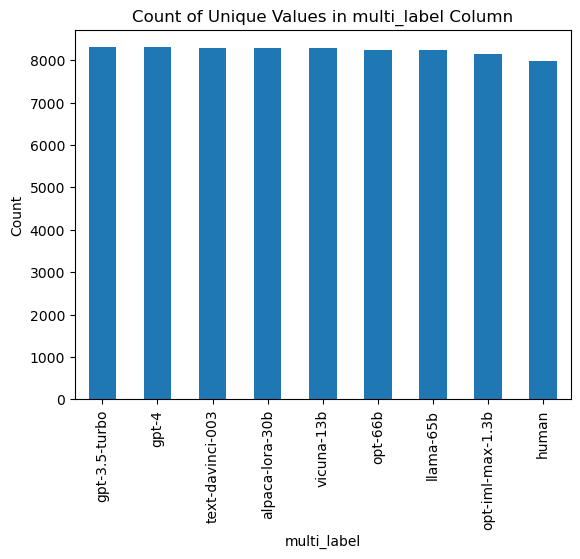

In [14]:

# Count the unique values in the multi_label column
multi_label_counts = df['multi_label'].value_counts()

# Plot the count of unique values
multi_label_counts.plot(kind='bar')

# Set the title and labels
plt.title('Count of Unique Values in multi_label Column')
plt.xlabel('multi_label')
plt.ylabel('Count')

# Show the plot
plt.show()

c:\ProgramData\anaconda3\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


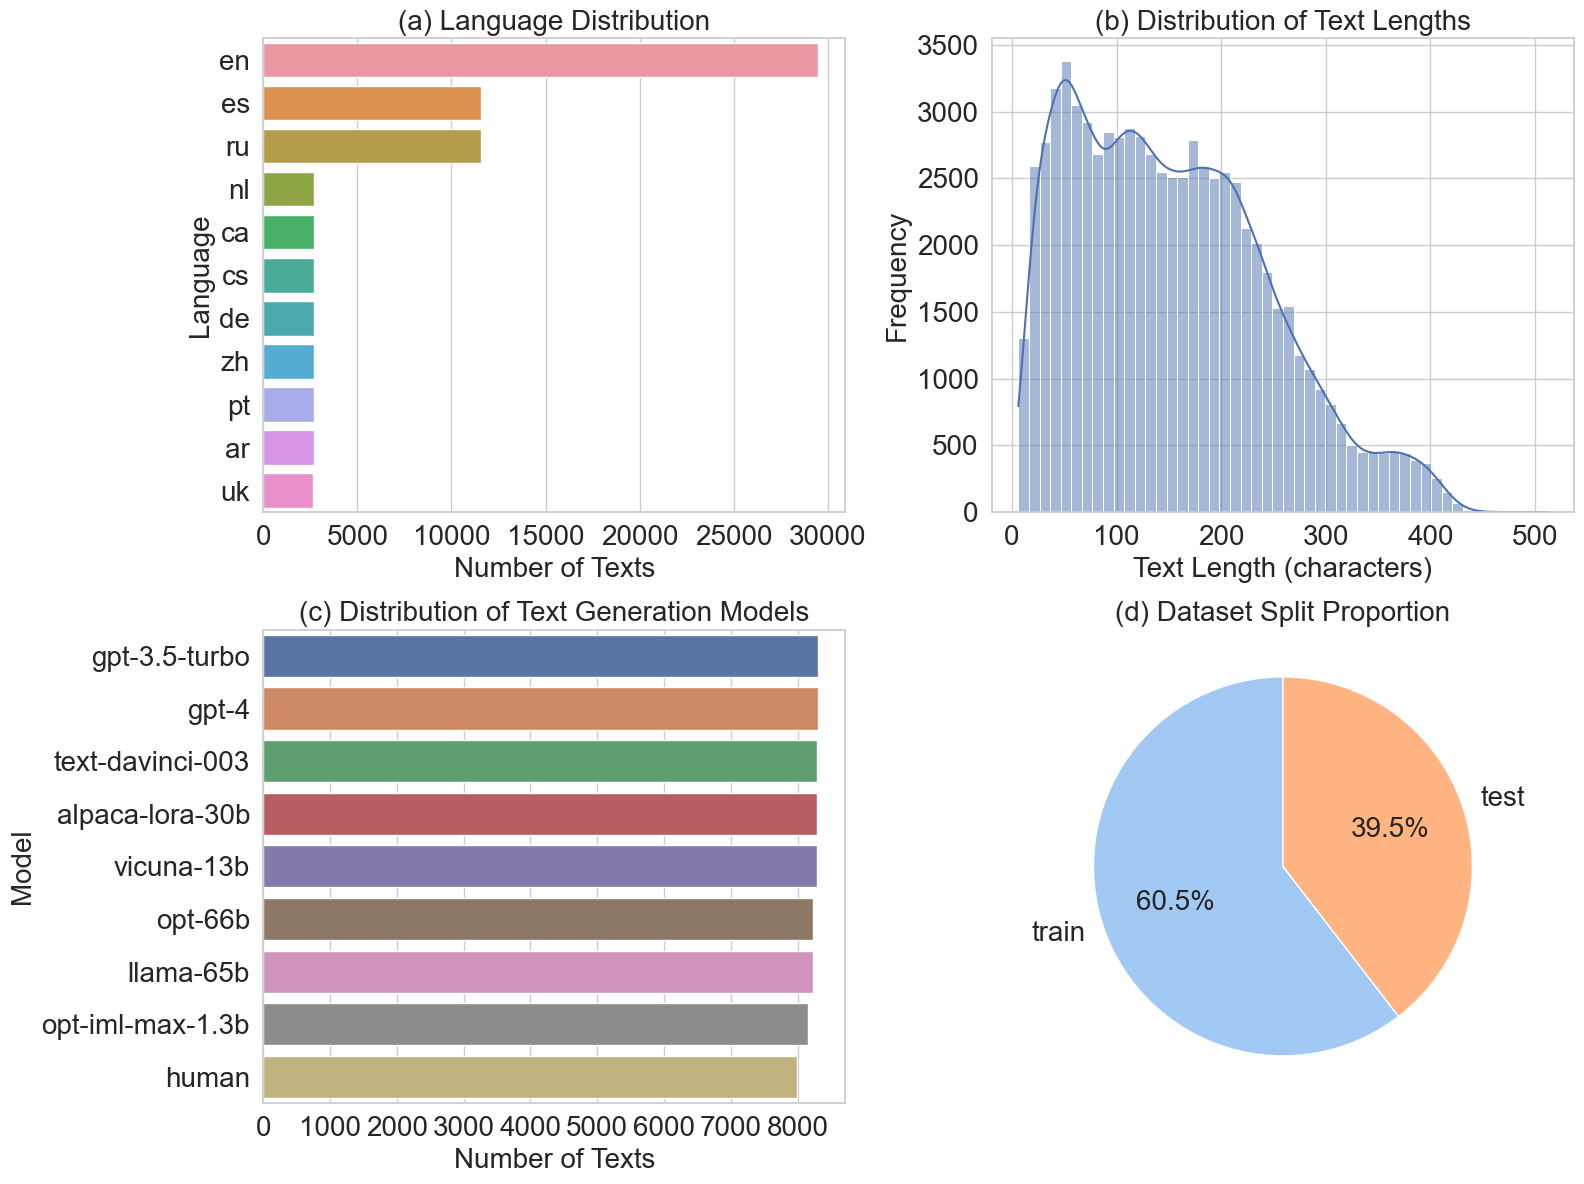

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# increase the text size


# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Creating a figure to hold the plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar Chart of Languages (a)
sns.countplot(y=df['language'], order=df['language'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('(a) Language Distribution')
axes[0, 0].set_xlabel('Number of Texts')
axes[0, 0].set_ylabel('Language')

# Histogram of Text Lengths (b)
sns.histplot(df['length'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('(b) Distribution of Text Lengths')
axes[0, 1].set_xlabel('Text Length (characters)')
axes[0, 1].set_ylabel('Frequency')



# Bar Chart of Models Used (c)
model_order = df['multi_label'].value_counts().index
sns.countplot(y=df['multi_label'], order=model_order, ax=axes[1, 0])
axes[1, 0].set_title('(c) Distribution of Text Generation Models')
axes[1, 0].set_xlabel('Number of Texts')
axes[1, 0].set_ylabel('Model')

# Pie Chart of df Splits (d)
axes[1, 1].pie(df['split'].value_counts(), labels=df['split'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), textprops={'fontsize': 20})
axes[1, 1].set_title('(d) Dataset Split Proportion')
# increase the text size
for ax in axes.flatten():
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
plt.tight_layout()
plt.show()



In [7]:
#training a ensemble voting classifier on all languages together
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

NameError: name 'train_df' is not defined

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [23]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), sublinear_tf=True)

# Vectorize the sampled training data and the full test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Vectorization complete.")

Vectorization complete.


In [24]:
# Creating a voting classifier with SGD and Logistic Regression
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, loss="modified_huber")
lr_clf = LogisticRegression(solver="liblinear")
voting_clf = VotingClassifier(
    estimators=[('sgd', sgd_clf), ('lr', lr_clf)],
    voting='soft'
)

# Training the classifier on the sampled data
voting_clf.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('sgd', SGDClassifier(loss='modified_huber')),
                             ('lr', LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [26]:
#Predicting and evaluating the classifier
y_pred = voting_clf.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8908004778972521
              precision    recall  f1-score   support

           0       0.89      0.01      0.03      3236
           1       0.89      1.00      0.94     26059

    accuracy                           0.89     29295
   macro avg       0.89      0.51      0.48     29295
weighted avg       0.89      0.89      0.84     29295



C:\Users\27gur\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


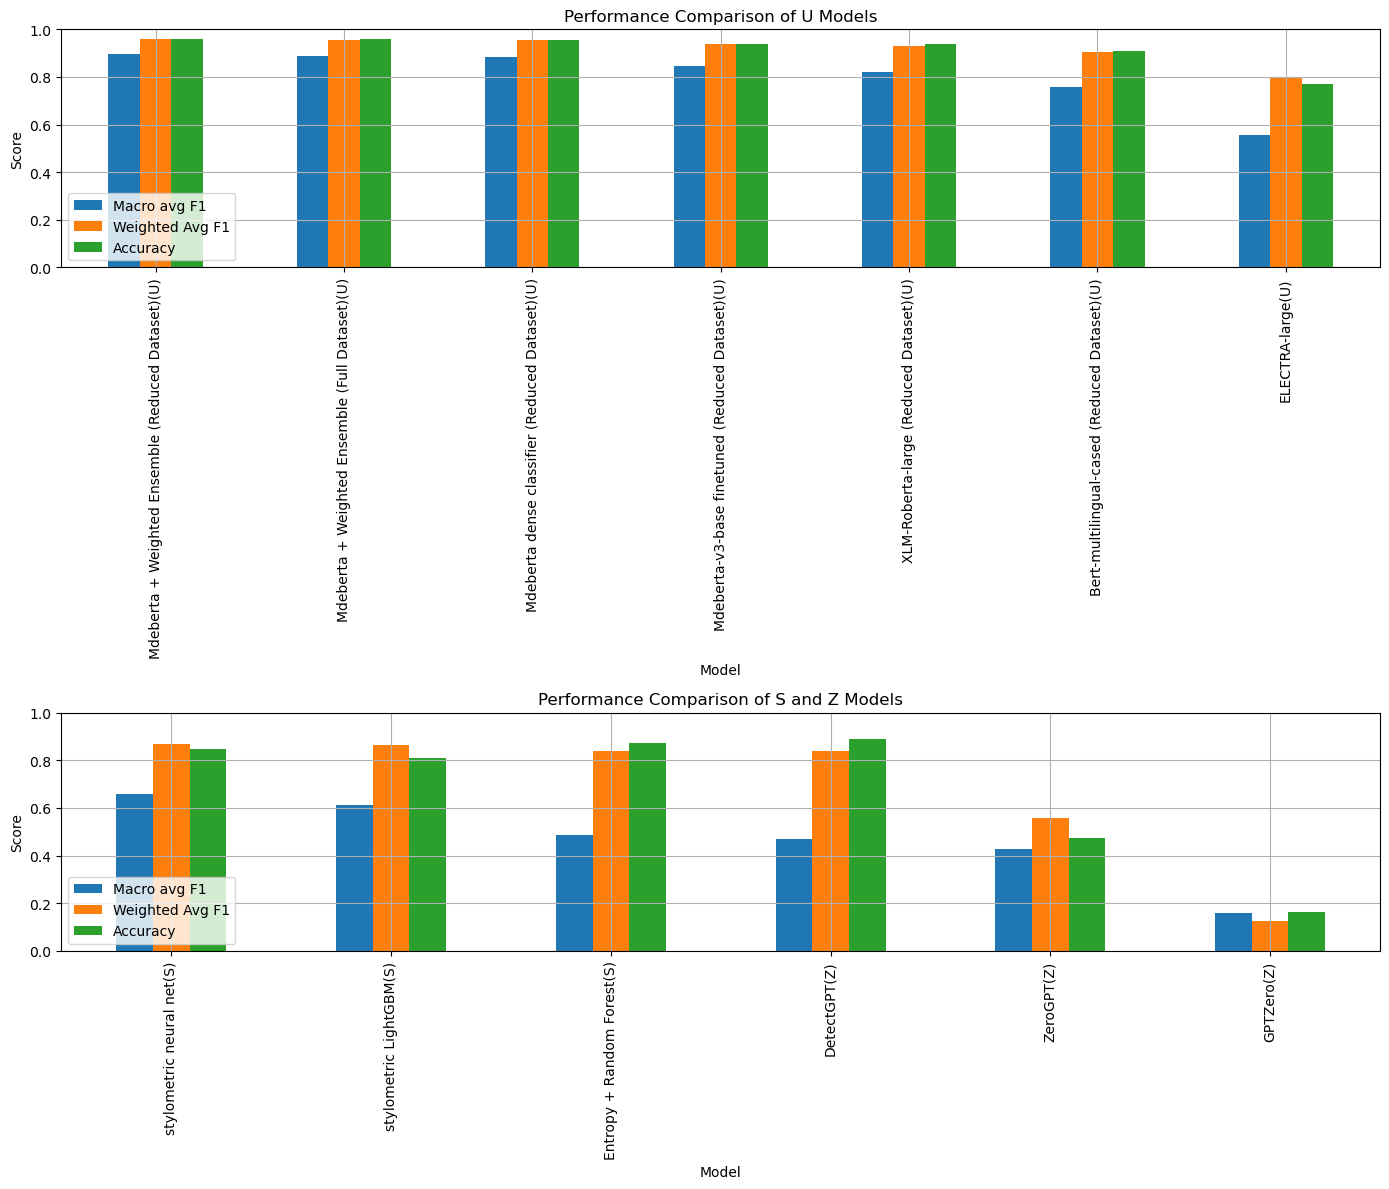

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    "Model": [
        "Mdeberta + Weighted Ensemble (Reduced Dataset)(U)", 
        "Mdeberta + Weighted Ensemble (Full Dataset)(U)", 
        "Mdeberta dense classifier (Reduced Dataset)(U)", 
        "Mdeberta-v3-base finetuned (Reduced Dataset)(U)", 
        "XLM-Roberta-large (Reduced Dataset)(U)", 
        "Bert-multilingual-cased (Reduced Dataset)(U)", 
        "stylometric neural net(S)", 
        "stylometric LightGBM(S)", 
        "ELECTRA-large(U)", 
        "Entropy + Random Forest(S)", 
        "DetectGPT(Z)", 
        "ZeroGPT(Z)", 
        "GPTZero(Z)"
    ],
    "Macro avg F1": [
        0.8956, 0.8888, 0.8845, 0.8480, 0.8194, 0.7563, 0.6599, 0.6110, 0.5559, 0.4863, 0.4708, 0.4259, 0.1605
    ],
    "Weighted Avg F1": [
        0.9594, 0.9570, 0.9548, 0.9403, 0.9308, 0.9051, 0.8685, 0.8634, 0.7952, 0.8375, 0.8375, 0.5559, 0.1258
    ],
    "Accuracy": [
        0.9598, 0.9577, 0.9553, 0.9396, 0.9388, 0.9104, 0.8473, 0.8096, 0.7684, 0.8729, 0.8895, 0.4744, 0.1629
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Separate U models and combined S and Z models
u_models = df[df['Model'].str.contains('\(U\)')]
sz_models = df[df['Model'].str.contains('\(S\)|\(Z\)')]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# U Models
u_models.plot(kind='bar', x='Model', y=['Macro avg F1', 'Weighted Avg F1', 'Accuracy'], ax=ax[0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[0].set_title('Performance Comparison of U Models')
ax[0].set_ylabel('Score')
ax[0].set_ylim(0, 1)
ax[0].grid(True)
ax[0].legend(loc='lower left')

# S and Z Models
sz_models.plot(kind='bar', x='Model', y=['Macro avg F1', 'Weighted Avg F1', 'Accuracy'], ax=ax[1], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[1].set_title('Performance Comparison of S and Z Models')
ax[1].set_ylabel('Score')
ax[1].set_ylim(0, 1)
ax[1].grid(True)
ax[1].legend(loc='lower left')

plt.tight_layout()
plt.show()


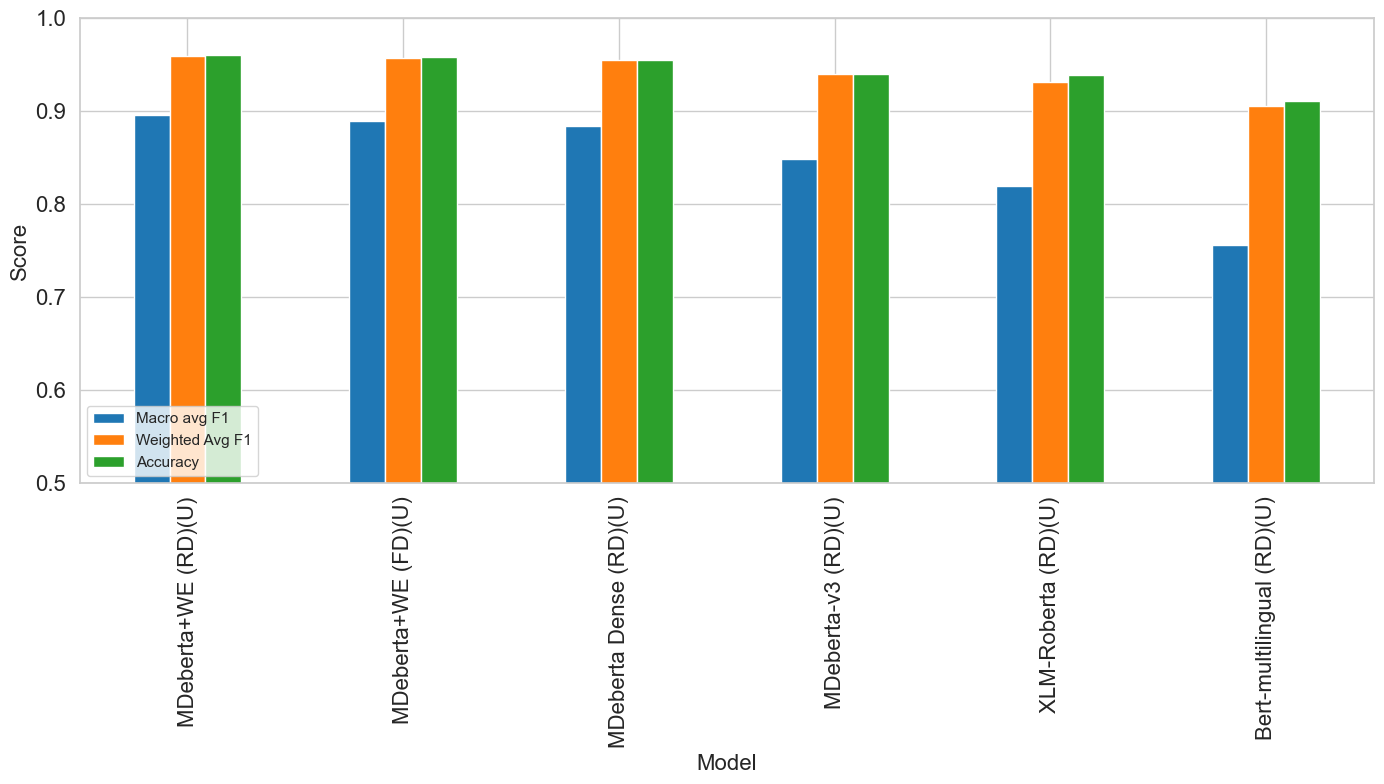

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data with shortened names
data = {
    "Model": [
        "MDeberta+WE (RD)(U)", 
        "MDeberta+WE (FD)(U)", 
        "MDeberta Dense (RD)(U)", 
        "MDeberta-v3 (RD)(U)", 
        "XLM-Roberta (RD)(U)", 
        "Bert-multilingual (RD)(U)", 
        "Stylometric NN (S)", 
        "Stylometric LGBM (S)", 
        "ELECTRA-large (U)", 
        "Entropy+RF (S)", 
        "DetectGPT (Z)", 
        "ZeroGPT (Z)", 
        "GPTZero (Z)"
    ],
    "Macro avg F1": [
        0.8956, 0.8888, 0.8845, 0.8480, 0.8194, 0.7563, 0.6599, 0.6110, 0.5559, 0.4863, 0.4708, 0.4259, 0.1605
    ],
    "Weighted Avg F1": [
        0.9594, 0.9570, 0.9548, 0.9403, 0.9308, 0.9051, 0.8685, 0.8634, 0.7952, 0.8375, 0.8375, 0.5559, 0.1258
    ],
    "Accuracy": [
        0.9598, 0.9577, 0.9553, 0.9396, 0.9388, 0.9104, 0.8473, 0.8096, 0.7684, 0.8729, 0.8895, 0.4744, 0.1629
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

#plot top 6 models macro avg f1 , weighted avg f1 and accuracy
df = df.sort_values(by='Macro avg F1', ascending=False)


top_6_models = df.head(6)
fig, ax = plt.subplots(1, 1, figsize=(14, 8))


top_6_models.plot(kind='bar', x='Model', y=['Macro avg F1', 'Weighted Avg F1', 'Accuracy'], ax=ax, color=[]) 
ax.set_ylabel('Score')
ax.set_ylim(0.5, 1)
ax.grid(True)
ax.legend(loc='lower left')
# increase the text size
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.tight_layout()
plt.show()





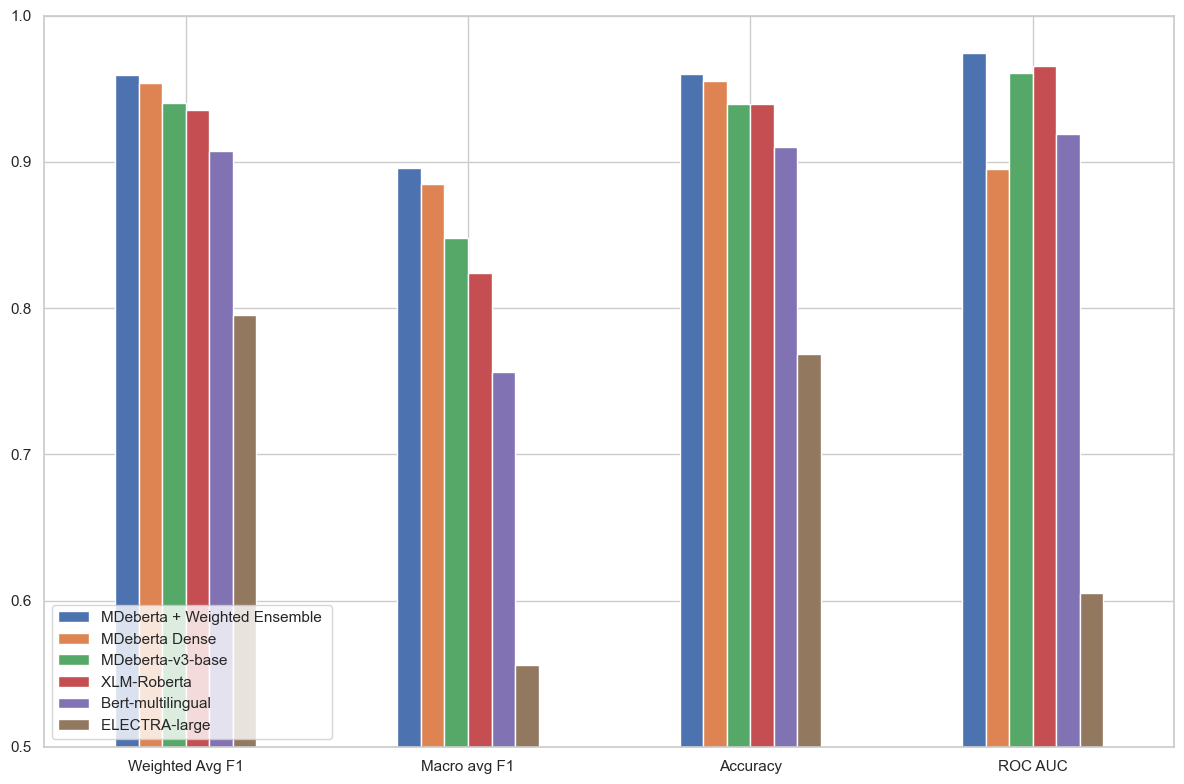

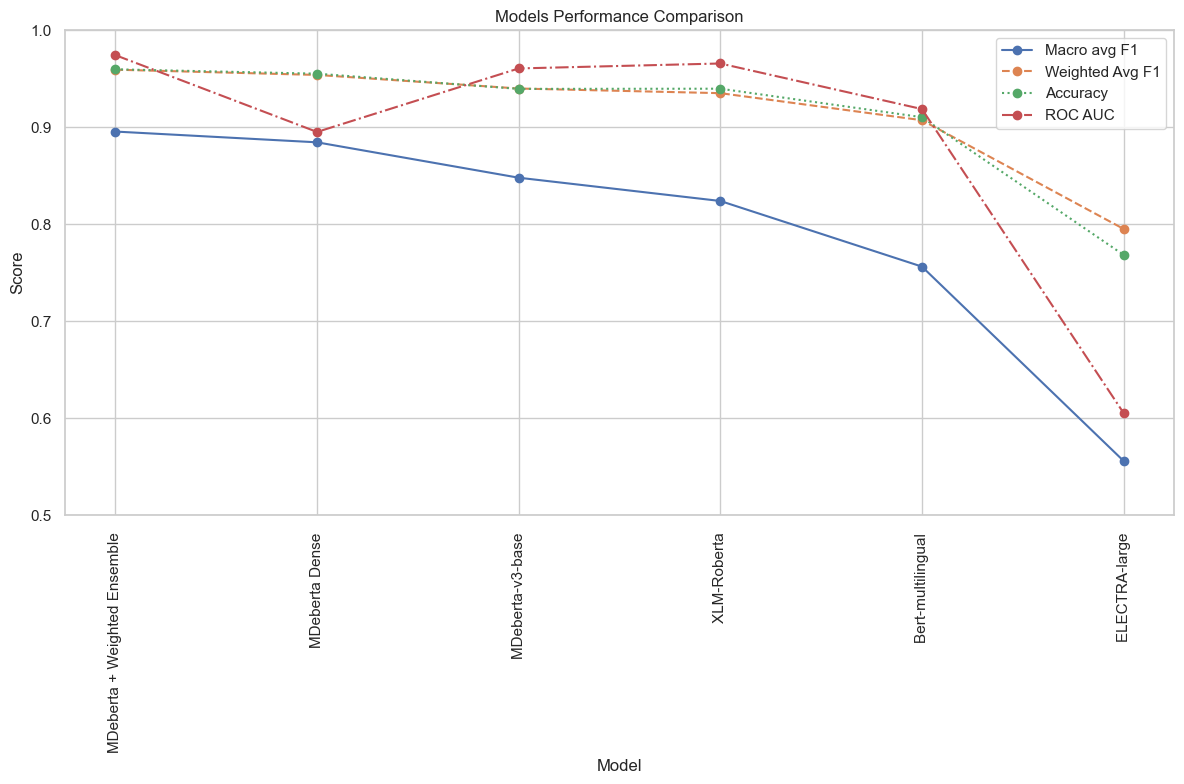

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the updated data
data = {
    "Model": [
        "MDeberta + Weighted Ensemble (U)", 
        "MDeberta Dense (U)", 
        "MDeberta-v3-base (U)", 
        "XLM-Roberta (U)", 
        "Bert-multilingual (U)", 
        "ELECTRA-large (U)", 
        "Stylometric NN (S)", 
        "Stylometric LGBM (S)", 
        "Entropy+RF (S)", 
        "DetectGPT (Z)", 
        "ZeroGPT (Z)", 
        "GPTZero (Z)"
    ],
    "Macro avg F1": [
        0.8956, 0.8845, 0.8480, 0.8240, 0.7563, 0.5559, 0.6599, 0.6110, 0.4863, 0.4708, 0.4259, 0.1605
    ],
    "Weighted Avg F1": [
        0.9594, 0.9540, 0.9400, 0.9352, 0.9073, 0.7952, 0.8566, 0.8679, 0.8335, 0.8375, 0.5559, 0.1258
    ],
    "Accuracy": [
        0.9598, 0.9553, 0.9396, 0.9398, 0.9104, 0.7684, 0.8473, 0.8906, 0.8729, 0.8895, 0.4744, 0.1629
    ],
    "ROC AUC": [
        0.9744, 0.8952, 0.9607, 0.9658, 0.9188, 0.6053, 0.8165, 0.9802, None, None, None, None
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)


# keep only (U) models
df = df[df['Model'].str.contains('\(U\)')]
# remove the (U) from the model names
df['Model'] = df['Model'].str.replace('(U)', '')

# order should be macro avg f1, weighted avg f1, accuracy, roc auc
df = df[['Model', 'Macro avg F1', 'Weighted Avg F1', 'Accuracy', 'ROC AUC']]
# Group the models by evaluation metric
df_bar = df.melt(id_vars='Model', var_name='Metric', value_name='Score')



# Plotting bar graphs
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# keep the order of the metrics as in the data
# the model order should sortted by the macro avg f1 score
df_bar['Model'] = pd.Categorical(df_bar['Model'], categories=df.sort_values(by='Macro avg F1', ascending=False)['Model'], ordered=True)
df_bar['Metric'] = pd.Categorical(df_bar['Metric'], categories=['Weighted Avg F1', 'Macro avg F1', 'Accuracy', 'ROC AUC'], ordered=True)
# All Model
# make the x axis labels horizontal
df_bar.pivot(index='Metric', columns='Model', values='Score').plot(kind='bar', ax=ax)
# remove the x axis title
ax.set_xlabel('')
ax.set_ylim(0.5, 1)
ax.grid(True)
ax.legend(loc='lower left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


# Line graph comparing top 6 models

plt.figure(figsize=(12, 8))
plt.plot(df['Model'], df['Macro avg F1'], marker='o', linestyle='-', label='Macro avg F1')
plt.plot(df['Model'], df['Weighted Avg F1'], marker='o', linestyle='--', label='Weighted Avg F1')
plt.plot(df['Model'], df['Accuracy'], marker='o', linestyle=':', label='Accuracy')
plt.plot(df['Model'], df['ROC AUC'], marker='o', linestyle='-.', label='ROC AUC')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Models Performance Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.ylim(0.5, 1)
plt.tight_layout()
plt.show()
